### Naive Bayes classifier
In machine learning, naive Bayes classifiers are a family of simple "probabilistic classifiers "based on applying Bayes' theorem with strong (naive) independence assumptions between the features.


$${\mbox{posterior}}={\frac {{\mbox{prior}}\times {\mbox{likelihood}}}{\mbox{evidence}}}$$
<br/>

Now the "naive" conditional independence assumptions come into play: assume that each feature $x_{i}$ is conditionally independent of every other feature $x_{j}$ for $j\neq i$, given the category $C_{k}$. This means that:
$${\displaystyle p(x_{i}\mid x_{i+1},\dots ,x_{n},C_{k})=p(x_{i}\mid C_{k})\,}$$ <br/>
Thus, the joint model can be expressed as:
$${\displaystyle {\begin{aligned}p(C_{k}\mid x_{1},\dots ,x_{n})&\varpropto p(C_{k},x_{1},\dots ,x_{n})=\\&=p(C_{k})\ p(x_{1}\mid C_{k})\ p(x_{2}\mid C_{k})\ p(x_{3}\mid C_{k})\ \cdots \\&=p(C_{k})\prod _{i=1}^{n}p(x_{i}\mid C_{k})\,.\end{aligned}}}$$


The discussion so far has derived the independent feature model, that is, the naive Bayes probability model. The naive Bayes classifier combines this model with a decision rule. One common rule is to pick the hypothesis that is most probable; this is known as the maximum a posteriori or MAP decision rule. The corresponding classifier, a Bayes classifier, is the function that assigns a class label ${\hat  {y}}=C_{k}$ for some k as follows:
$${\displaystyle {\hat {y}}={\underset {k\in \{1,\dots ,K\}}{\operatorname {argmax} }}\ p(C_{k})\displaystyle \prod _{i=1}^{n}p(x_{i}\mid C_{k}).}$$

### Gaussian naive Bayes
When dealing with continuous data, a typical assumption is that the continuous values `associated` with each class are distributed according to a `Gaussian distribution`. For example, suppose the training data contains a continuous attribute, `x`. We first segment the data by the class, and then compute the mean and variance of `x` in each class. Let $\mu _{k}$ be the mean of the values in x associated with class $C_{k}$, and let $\sigma _{k}^{2}$ be the variance of the values in x associated with class Ck. Suppose we have collected some observation value v. Then, the probability distribution of v given a class $C_{k}$, $p(x=v\mid C_{k})$, can be computed by plugging v into the equation for a Normal distribution parameterized by $\mu _{k}$ and $\sigma _{k}^{2}$: 
<br/>
that is,
$$p(x=v\mid C_{k})={\frac {1}{\sqrt {2\pi \sigma _{k}^{2}}}}\,e^{-{\frac {(v-\mu _{k})^{2}}{2\sigma _{k}^{2}}}}$$

# News Classifior
1. Data cleaning (Stop words/punctuation)
2. Similarity 
3. Clustering / Classification / Regression / Prediction


In [1]:
import pandas as pd
import numpy as np
import jieba
# http://www.sogou.com/labs/resource/ca.php

In [2]:
df_news = pd.read_table('./resources/val.txt',names = ['category','theme','URL','content'],encoding='utf-8')
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
category    5000 non-null object
theme       5000 non-null object
URL         5000 non-null object
content     5000 non-null object
dtypes: object(4)
memory usage: 156.3+ KB


In [3]:
df_news = df_news.dropna()
df_news.head()

,category,theme,URL,content
0,汽车,新辉腾 ４．２ Ｖ８ ４座加长Ｉｎｄｉｖｉｄｕａｌ版２０１１款 最新报价,http://auto.data.people.com.cn/model_15782/,经销商 电话 试驾／订车Ｕ憬杭州滨江区江陵路１７８０号４００８－１１２２３３转５８６４＃保常...
1,汽车,９１８ Ｓｐｙｄｅｒ概念车,http://auto.data.people.com.cn/prdview_165423....,呼叫热线 ４００８－１００－３００ 服务邮箱 ｋｆ＠ｐｅｏｐｌｅｄａｉｌｙ．ｃｏｍ．ｃｎ
2,汽车,日内瓦亮相 ＭＩＮＩ性能版／概念车－１．６Ｔ引擎,http://auto.data.people.com.cn/news/story_5249...,ＭＩＮＩ品牌在二月曾经公布了最新的ＭＩＮＩ新概念车Ｃｌｕｂｖａｎ效果图，不过现在在日内瓦车展...
3,汽车,清仓大甩卖一汽夏利Ｎ５威志Ｖ２低至３．３９万,http://auto.data.people.com.cn/news/story_6144...,清仓大甩卖！一汽夏利Ｎ５、威志Ｖ２低至３．３９万＝日，启新中国一汽强势推出一汽夏利Ｎ５、威志...
4,汽车,大众敞篷家族新成员 高尔夫敞篷版实拍,http://auto.data.people.com.cn/news/story_5686...,在今年３月的日内瓦车展上，我们见到了高尔夫家族的新成员，高尔夫敞篷版，这款全新敞篷车受到了众...


### term spliter

In [4]:
content = df_news.content.values.tolist()
print (content[1000])

阿里巴巴集团昨日宣布，将在集团管理层面设立首席数据官岗位（Ｃｈｉｅｆ　Ｄａｔａ　Ｏｆｆｉｃｅｒ），阿里巴巴Ｂ２Ｂ公司ＣＥＯ陆兆禧将会出任上述职务，向集团ＣＥＯ马云直接汇报。＞菹ぃ和６月初的首席风险官职务任命相同，首席数据官亦为阿里巴巴集团在完成与雅虎股权谈判，推进“ｏｎｅ　ｃｏｍｐａｎｙ”目标后，在集团决策层面新增的管理岗位。０⒗锛团昨日表示，“变成一家真正意义上的数据公司”已是战略共识。记者刘夏


In [5]:
content_S = []
for line in content:
    current_segment = jieba.lcut(line) # term splitor
    if len(current_segment) > 1 and current_segment != '\r\n': 
        content_S.append(current_segment) 

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/h0/9_cmr0zd76zf8c0zf0pkqhdr0159kl/T/jieba.cache
Loading model cost 2.616 seconds.
Prefix dict has been built succesfully.


In [6]:
content_S[1000][:20]

['阿里巴巴',
 '集团',
 '昨日',
 '宣布',
 '，',
 '将',
 '在',
 '集团',
 '管理',
 '层面',
 '设立',
 '首席',
 '数据',
 '官',
 '岗位',
 '（',
 'Ｃ',
 'ｈ',
 'ｉ',
 'ｅ']

In [7]:
df_content=pd.DataFrame({'content_S':content_S})
df_content.head()

,content_S
0,"[经销商, , 电话, , 试驾, ／, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, ..."
1,"[呼叫, 热线, , ４, ０, ０, ８, －, １, ０, ０, －, ３, ０, ０..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 在, 二月, 曾经, 公布, 了, 最新, 的, Ｍ, Ｉ..."
3,"[清仓, 大, 甩卖, ！, 一汽, 夏利, Ｎ, ５, 、, 威志, Ｖ, ２, 低至, ..."
4,"[在, 今年, ３, 月, 的, 日内瓦, 车展, 上, ，, 我们, 见到, 了, 高尔夫..."


In [8]:
# load stopword as df
stopwords = pd.read_csv(
    "./resources/stopwords.txt",
    index_col=False,
    sep="\t",
    quoting=3,
    names=['stopword'],
    encoding='utf-8')
stopwords.head(10)

,stopword
0,!
1,""""
2,#
3,$
4,%
5,&
6,'
7,(
8,)
9,*


In [9]:
def drop_stopwords(contents,stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word) 
            all_words.append(str(word)) # bag of words
        contents_clean.append(line_clean)
    return contents_clean,all_words

contents = df_content.content_S.values.tolist()    
stopwords = stopwords.stopword.values.tolist()
contents_clean,all_words = drop_stopwords(contents,stopwords)

In [10]:
df_content=pd.DataFrame({'contents_clean':contents_clean})
df_content.head()

,contents_clean
0,"[经销商, 电话, 试驾, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, ..."
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念..."
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ..."
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,..."


In [11]:
df_all_words=pd.DataFrame({'all_words':all_words})
df_all_words.head()

,all_words
0,经销商
1,电话
2,试驾
3,订车
4,Ｕ


In [12]:
words_count=df_all_words.groupby(by=['all_words'])['all_words'].agg({"count":np.size}) #bag of words
# reset_index: ranking the table according to ..
words_count=words_count.reset_index().sort_values(by=["count"],ascending=False) #term-frequency
words_count.head()

/Users/jkchang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,all_words,count
4077,中,5199
4209,中国,3115
88255,说,3055
104747,Ｓ,2646
1373,万,2390


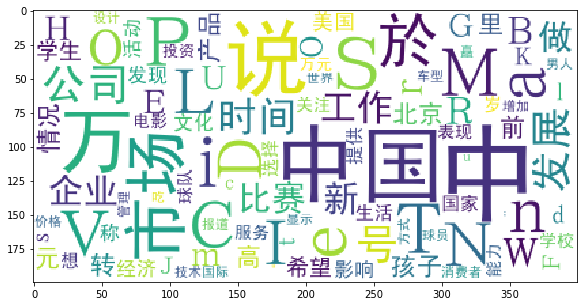

In [13]:
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

wordcloud=WordCloud(font_path="./resources/simhei.ttf",background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_count.head(100).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

### TF_IDF

In [38]:
import jieba.analyse
index = 1024
print (df_news['content'][index])
content_S_str = "".join(content_S[index])  
print ("  ".join(jieba.analyse.extract_tags(content_S_str, topK=5, withWeight=False)))

据国外媒体报道，英特尔董事会今日宣布了最新季度派息消息，此次股息为每股普通股２２．５美分（年化股息为每股９０美分），股权登记日为２０１２年８月７日，股息派发日为２０１２年９月１日。Ｓ⑻囟为计算机创新领域的全球领先者，它设计和生产的芯片是全球计算设备的基础。
股息  美分  每股  年化  日为


### LDA
In natural language processing, latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's creation is attributable to one of the document's topics. <br/>
格式要求：list of list形式，分词好的的整个语料

In [15]:
from gensim import corpora, models, similarities
import gensim
#做映射，相当于词袋
dictionary = corpora.Dictionary(contents_clean)
corpus = [dictionary.doc2bow(sentence) for sentence in contents_clean]

In [16]:
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=20) #类似Kmeans自己指定K值

In [17]:
#一号分类结果
print (lda.print_topic(1, topn=5))

0.009*"万" + 0.006*"号" + 0.004*"转" + 0.003*"Ｖ" + 0.003*"Ｓ"


In [18]:
for topic in lda.print_topics(num_topics=20, num_words=5):
    print (topic[1])

0.006*"中" + 0.005*"该剧" + 0.004*"官兵" + 0.003*"撒" + 0.003*"肌肤"
0.009*"万" + 0.006*"号" + 0.004*"转" + 0.003*"Ｖ" + 0.003*"Ｓ"
0.008*"节目" + 0.005*"演员" + 0.005*"中" + 0.005*"主持人" + 0.004*"粉丝"
0.005*"中" + 0.004*"说" + 0.004*"音乐" + 0.003*"发展" + 0.003*"中国"
0.013*"电影" + 0.008*"观众" + 0.007*"中" + 0.007*"导演" + 0.006*"影片"
0.022*"ａ" + 0.019*"ｅ" + 0.017*"ｉ" + 0.015*"ｏ" + 0.014*"ｎ"
0.005*"中" + 0.004*"说" + 0.003*"考生" + 0.003*"唱" + 0.002*"祝福"
0.011*"卫视" + 0.006*"万" + 0.005*"号" + 0.002*"睫毛" + 0.002*"转"
0.005*"说" + 0.004*"中" + 0.003*"恋情" + 0.003*"学生" + 0.003*"中国"
0.006*"中" + 0.005*"皮肤" + 0.004*"Ｍ" + 0.004*"肌肤" + 0.004*"Ｓ"
0.013*"男人" + 0.009*"女人" + 0.005*"中" + 0.004*"说" + 0.003*"女性"
0.004*"中" + 0.004*"文化" + 0.004*"说" + 0.003*"导演" + 0.003*"电影"
0.005*"中" + 0.005*"说" + 0.005*"孩子" + 0.004*"老公" + 0.004*"男人"
0.009*"考生" + 0.005*"中" + 0.004*"中国" + 0.002*"说" + 0.002*"北京"
0.007*"比赛" + 0.005*"中" + 0.005*"中国" + 0.004*"说" + 0.004*"意大利"
0.009*"球队" + 0.009*"中" + 0.007*"选手" + 0.006*"饰演" + 0.004*"角色"
0.007*"比赛" + 0.004*"专辑" + 0.

In [19]:
df_train=pd.DataFrame({'contents_clean':contents_clean,'label':df_news['category']})
df_train.tail()

,contents_clean,label
4995,"[天气, 炎热, 补水, 变得, 美国, 跑步, 世界, 杂志, 报道, 喝水, 身体, 补...",时尚
4996,"[不想, 说, 话, 刺激, 说, 做, 只能, 走, 离开, 伤心地, 想起, 一句, 话...",时尚
4997,"[岁, 刘晓庆, 最新, 嫩照, Ｏ, 衷, 诘, 牧跸, 庆, 看不出, 岁, 秒杀, 刘...",时尚
4998,"[导语, 做, 爸爸, 一种, 幸福, 无论是, 领养, 亲生, 更何况, 影视剧, 中, ...",时尚
4999,"[全球, 最美, 女人, 合成图, 国, 整形外科, 教授, 李承哲, 国际, 学术, 杂志...",时尚


In [20]:
df_train.label.unique()

array(['汽车', '财经', '科技', '健康', '体育', '教育', '文化', '军事', '娱乐', '时尚'], dtype=object)

In [21]:
label_mapping = {"汽车": 1, "财经": 2, "科技": 3, "健康": 4, "体育":5, "教育": 6,"文化": 7,"军事": 8,"娱乐": 9,"时尚": 0}
df_train['label'] = df_train['label'].map(label_mapping)
df_train.head()

,contents_clean,label
0,"[经销商, 电话, 试驾, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, ...",1
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,...",1
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念...",1
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ...",1
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,...",1


In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df_train['contents_clean'].values,
    df_train['label'].values,
    random_state=1)

In [23]:
#x_train = x_train.flatten()
x_train[0][1]

'上海'

In [24]:
words = []
for line_index in range(len(x_train)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        words.append(' '.join(x_train[line_index]))
    except:
        print (line_index,word_index)
words[0] 

'中新网 上海 日电 于俊 父亲节 网络 吃 一顿 电影 快餐 微 电影 爸 对不起 我爱你 定于 本月 父亲节 当天 各大 视频 网站 首映 葜 谱 鞣 剑 保慈 障蚣 钦 呓 樯 埽 ⒌ 缬 埃 ǎ 停 椋 悖 颍 铩 妫 椋 恚 称 微型 电影 新 媒体 平台 播放 状态 短时 休闲 状态 观看 完整 策划 系统 制作 体系 支持 显示 较完整 故事情节 电影 微 超短 放映 微 周期 制作 天 数周 微 规模 投资 人民币 几千 数万元 每部 内容 融合 幽默 搞怪 时尚 潮流 人文 言情 公益 教育 商业 定制 主题 单独 成篇 系列 成剧 唇 开播 微 电影 爸 对不起 我爱你 讲述 一对 父子 观念 缺少 沟通 导致 关系 父亲 传统 固执 钟情 传统 生活 方式 儿子 新派 音乐 达 习惯 晚出 早 生活 性格 张扬 叛逆 两种 截然不同 生活 方式 理念 差异 一场 父子 间 拉开序幕 子 失手 打破 父亲 心爱 物品 父亲 赶出 家门 剧情 演绎 父亲节 妹妹 哥哥 化解 父亲 这场 矛盾 映逋坏 嚼 斫 狻 ⒍ 粤 ⒌ 桨容 争执 退让 传统 尴尬 父子 尴尬 情 男人 表达 心中 那份 感恩 一杯 滤挂 咖啡 父亲节 变得 温馨 镁 缬 缮 虾 Ｎ 逄 煳 幕 传播 迪欧 咖啡 联合 出品 出品人 希望 观摩 扪心自问 父亲节 父亲 记得 父亲 生日 哪一天 父亲 爱喝 跨出 家门 那一刻 感觉 一颗 颤动 心 操劳 天下 儿女 父亲节 大声 喊出 父亲 家人 爱 完'

In [25]:
print (len(words))

3750


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
texts = ["dog cat fish", "dog cat cat", "fish bird", 'bird']
cv = CountVectorizer()
cv_fit = cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())

print(cv_fit.toarray().sum(axis=0))

['bird', 'cat', 'dog', 'fish']
[[0 1 1 1]
 [0 2 1 0]
 [1 0 0 1]
 [1 0 0 0]]
[2 3 2 2]


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
texts = ["dog cat fish", "dog cat cat", "fish bird", 'bird']
cv = CountVectorizer(ngram_range=(1, 4))
cv_fit = cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())

print(cv_fit.toarray().sum(axis=0))

['bird', 'cat', 'cat cat', 'cat fish', 'dog', 'dog cat', 'dog cat cat', 'dog cat fish', 'fish', 'fish bird']
[[0 1 0 1 1 1 0 1 1 0]
 [0 2 1 0 1 1 1 0 0 0]
 [1 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0]]
[2 3 1 1 2 2 1 1 2 1]


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(analyzer='word', max_features=4000, lowercase=False)
vec.fit(words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=4000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [29]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vec.transform(words), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
test_words = []
for line_index in range(len(x_test)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        test_words.append(' '.join(x_test[line_index]))
    except:
         print (line_index,word_index)
test_words[0]

'国家 公务员 考试 申论 应用文 类 试题 实质 一道 集 概括 分析 提出 解决问题 一体 综合性 试题 说 一道 客观 凝练 申发 论述 文章 题目 分析 历年 国考 申论 真题 公文 类 试题 类型 多样 包括 公文 类 事务性 文书 类 题材 从题 干 作答 材料 内容 整合 分析 无需 太 创造性 发挥 纵观 历年 申论 真题 作答 应用文 类 试题 文种 格式 作出 特别 重在 内容 考查 行文 格式 考生 平常心 面对 应用文 类 试题 准确 把握 作答 领会 内在 含义 把握 题材 主旨 材料 结构 轻松 应对 应用文 类 试题 Ｒ 弧 ⒆ 钒 盐 展文 写作 原则 Ｔ 材料 中来 应用文 类 试题 材料 总体 把握 客观 考生 材料 中来 材料 中 把握 材料 准确 理解 题材 主旨 Ｔ 政府 角度 作答 应用文 类 试题 更应 注重 政府 角度 观点 政府 角度 出发 原则 表述 观点 提出 解决 之策 考生 作答 站 政府 人员 角度 看待 提出 解决问题 Ｔ 文体 结构 形式 考查 重点 文体 结构 大部分 评分 关键点 解答 方法 薄 ⒆ ス 丶 词 明 方向 作答 题目 题干 作答 作答 方向 作答 角度 关键 向导 考生 仔细阅读 题干 作答 抓住 关键词 作答 方向 相关 要点 整理 作答 思路 年国考 地市级 真 题为 例 潦惺姓 府 宣传 推进 近海 水域 污染 整治 工作 请 给定 资料 市政府 工作人员 身份 草拟 一份 宣传 纲要 Ｒ 求 保对 宣传 内容 要点 提纲挈领 陈述 玻 体现 政府 精神 全市 各界 关心 支持 污染 整治 工作 通俗易懂 超过 字 肮 丶 词 近海 水域 污染 整治 工作 市政府 工作人员 身份 宣传 纲要 提纲挈领 陈述 体现 政府 精神 全市 各界 关心 支持 污染 整治 工作 通俗易懂 提示 归结 作答 要点 包括 污染 情况 原因 解决 对策 作答 思路 情况 原因 对策 意义 逻辑 顺序 安排 文章 结构 病 ⒋ 缶殖 龇 ⅲ 明 结构 解答 应用文 类 试题 考生 材料 整体 出发 大局 出发 高屋建瓴 把握 材料 主题 思想 事件 起因 解决 对策 阅读文章 构建 文章 结构 直至 快速 解答 场 ⒗ 硭 乘悸 罚明 逻辑 应用文 类 试题 严密 逻辑思维 情况 原因 对策 意义

In [31]:
classifier.score(vec.transform(test_words), y_test)

0.80400000000000005

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vectorizer.fit(words)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=4000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [33]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vectorizer.transform(words), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
classifier.score(vectorizer.transform(test_words), y_test)

0.81520000000000004